# Ranger Walk-through: Classification Glue

In this notebook we'll walk you through on how to use *ranger* for multi-collection text classification with GLUE using runs with bert-base-cased and distilbert-base-cased.

This guide assumes you already computed and stored the item-wise accuracy.
You can use the [run_glue](./examples/classifcation-glue-data/run_glue_scripts/run_glue.py) script to attain the results in the format as in [the results folders](./examples/classification-glue-data/bert-base-cased).

This guide assumes you already installed ranger via pip. Let's get started by defining the location of our results and what we want to compare:

In [1]:
import os

from ranger.classification.data_pipeline import load_and_compute_metrics
from ranger.classification.config_location import ClassificationLocationConfig

config = ClassificationLocationConfig("./classification-glue-data/config.yaml")

title = 'BERT vs. DistilBERT'
control_rankings = "bert"  # this is a key in the config.yaml file
treatment_rankings = "distilbert"  # this is also a key in the config.yaml file

control_data = load_and_compute_metrics(control_rankings, config)
treatment_data = load_and_compute_metrics(treatment_rankings, config)

Now that we have loaded up our data and computed run-wise metrics over multiple tasks we can move on to computing the effect size comparing control and treatment experiments:

In [2]:
from ranger.metric_containers import AggregatedPairedMetrics, AggregatedMetrics
from ranger.meta_analysis import analyze_effects


effects = AggregatedPairedMetrics(
    treatment=treatment_data.get_metrics(),
    control=control_data.get_metrics()
)
effect_size = analyze_effects(list(config.display_names.values()),
                              effects=effects,
                              effect_type="SMD")
effect_size


,eff,ci_low,ci_upp,p,w_re
MNLI,-0.067849,-0.085384,-0.050313,3.375078e-14,0.260058
MRPC,-0.052792,-0.134490,0.028905,2.053294e-01,0.066049
QNLI,-0.070396,-0.096386,-0.044407,1.102927e-07,0.222320
QQP,-0.037032,-0.045924,-0.028139,2.220446e-16,0.290691
RTE,-0.154184,-0.295581,-0.012787,3.258090e-02,0.025795
SST-2,-0.048062,-0.100064,0.003941,7.007510e-02,0.123501
WNLI,0.224380,0.008046,0.440713,4.206705e-02,0.011585
combined_effect,-0.054860,-0.078603,-0.031118,5.933136e-06,1.000000


That's too many numbers!! Who can make sense of this wall of numbers? No one in any sensible amount of time! Therefore, let's feed our effect size results into ranger's forest plot method, to create a beautifully rendered & customizable figure:

*Note that we adjust the figure height, so that results of all collections are visible*

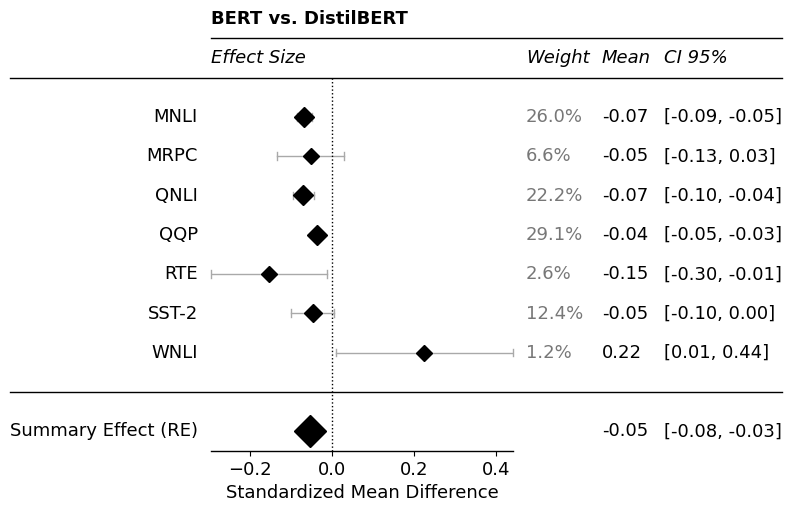

In [3]:
from ranger.forest_plots import forest_plot

plot = forest_plot(
    title=title,
    experiment_names=list(config.display_names.values()),
    label_x_axis="Standardized Mean Difference",
    effect_size=effect_size,
    fig_width=8,
    fig_height=8 # higher height because we have many (7) test sets
)


Awesome! Let's save the figure, so that we can use it to inform our result presentation:

In [4]:
fig_name = "./sample/"+control_rankings+"_vs_"+treatment_rankings

# save as svg for web display
plot.savefig(fname=fig_name+".svg", dpi=300, bbox_inches='tight')

# save as pdf for latex integration
plot.savefig(fname=fig_name+".pdf", dpi=300, bbox_inches='tight')

